Volumetric wavelet Data Processing
==================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores volumetric (3D) data processing.

In [1]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *
#from nt_solutions import multidim_2_volumetric as solutions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

3D Volumetric Datasets
----------------------


We load a volumetric data.

In [2]:
from nt_toolbox.read_bin import *
M = read_bin("nt_toolbox/data/vessels.bin", ndims=3)

In [3]:
M = rescale(M)

Size of the image (here it is a cube).

In [4]:
n = np.shape(M)[1]

We can display some horizontal slices.

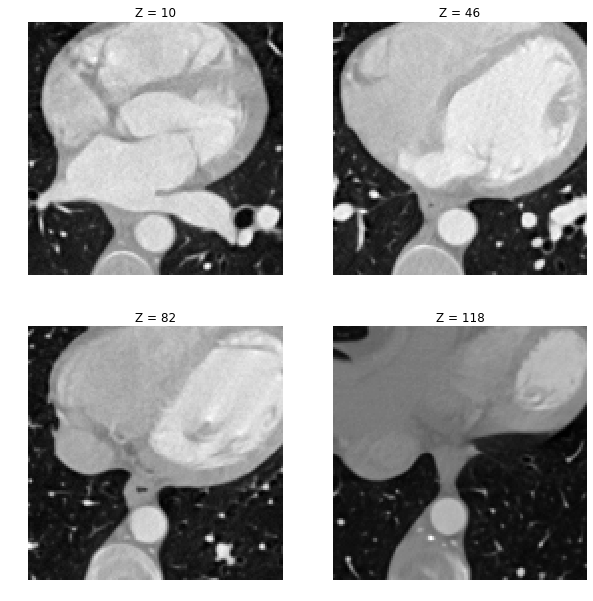

In [5]:
slices = np.round(np.linspace(10, n-10, 4))
plt.figure(figsize = (10,10))

for i in range(len(slices)):
    s = slices[i]
    imageplot(M[:,:,s], "Z = %i" %s, [2,2,i+1])

We can display an isosurface of the dataset (here we sub-sample to speed
up the computation).

ValueError: Colormap viridis is not recognized. Possible values are: bone_r, Pastel2, Accent, Set1_r, cubehelix, Set3_r, terrain, gist_gray, prism, RdYlGn, YlOrBr, flag_r, BuPu_r, YlGnBu_r, gnuplot, cool, Wistia, summer_r, ocean, bone, seismic_r, gray, spectral, BrBG_r, Pastel2_r, Accent_r, Purples_r, gnuplot2_r, copper, afmhot, PuOr, gist_heat_r, Greens, RdGy, RdBu_r, gist_gray_r, OrRd_r, YlGnBu, Paired, YlOrRd_r, pink_r, hsv, gist_yarg, prism_r, Wistia_r, autumn_r, spring_r, GnBu_r, autumn, Blues, PiYG, Blues_r, YlGn, winter_r, summer, seismic, gist_rainbow_r, nipy_spectral, gist_yarg_r, binary_r, RdPu_r, Greys_r, gist_ncar, copper_r, hsv_r, brg_r, cubehelix_r, cool_r, gist_earth, BuGn, gnuplot2, Set1, RdGy_r, RdPu, flag, gist_ncar_r, PuRd, Pastel1, gist_earth_r, BuPu, afmhot_r, spring, pink, CMRmap_r, gist_heat, bwr, terrain_r, PRGn_r, coolwarm_r, gist_stern_r, PuBuGn, winter, RdBu, PuBu_r, Greens_r, bwr_r, Oranges, Dark2_r, BrBG, Dark2, CMRmap, jet_r, Paired_r, PuOr_r, PuBu, nipy_spectral_r, Set2_r, Spectral_r, Set2, PuBuGn_r, Reds_r, gist_stern, Spectral, Reds, hot, PuRd_r, RdYlGn_r, YlOrRd, RdYlBu, RdYlBu_r, Oranges_r, YlOrBr_r, gnuplot_r, Pastel1_r, rainbow, Greys, brg, coolwarm, ocean_r, rainbow_r, gist_rainbow, BuGn_r, spectral_r, binary, hot_r, Set3, PiYG_r, GnBu, YlGn_r, gray_r, OrRd, Purples, jet, PRGn

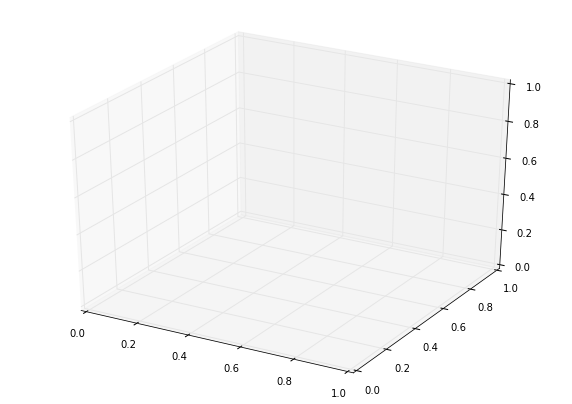

In [6]:
from nt_toolbox.isosurface import *
isosurface(M,.5,3)

3D Haar Transform
-----------------
An isotropic 3D Haar transform recursively extracts details wavelet
coefficients by performing local averages/differences along the X/Y/Z axis.


We apply a step of Haar transform in the X/Y/Z direction

Initialize the transform

In [ ]:
MW = np.copy(M)

Average/difference along X

In [ ]:
MW = np.concatenate(((MW[0:n:2,:,:] + MW[1:n:2,:,:])/np.sqrt(2), (MW[0:n:2,:,:] - MW[1:n:2,:,:])/np.sqrt(2)),0)

Average/difference along Y

In [ ]:
MW = np.concatenate(((MW[:,0:n:2,:] + MW[:,1:n:2,:])/np.sqrt(2), (MW[:,0:n:2,:] - MW[:,1:n:2,:])/np.sqrt(2)),1)

Average/difference along Z

In [ ]:
MW = np.concatenate(((MW[:,:,0:n:2] + MW[:,:,1:n:2])/np.sqrt(2), (MW[:,:,0:n:2] - MW[:,:,1:n:2])/np.sqrt(2)),2)

Display a horizontal and vertical slice to see the structure of the coefficients.

In [ ]:
plt.figure(figsize=(10,5))
imageplot(MW[:,:,30], "Horizontal slice", [1,2,1])
imageplot((MW[:,30,:]), "Vertical slice", [1,2,2])

__Exercise 1__

Implement the forward wavelet transform by iteratively applying these
transform steps to the low pass residual.

In [ ]:
#solutions.exo1()

In [ ]:
## Insert your code here.

MW = np.copy(M)
for j in range(1,int(np.log2(n))+1):
    p = int(n/2**(j-1))
    sel = np.arange(0,p)
    even = np.arange(0,p,2)
    odd = np.arange(1,p,2)
    # average/ difference along X
    MW[np.ix_(sel,sel,sel)] = np.concatenate(((MW[np.ix_(even,sel,sel)] + MW[np.ix_(odd,sel,sel)])/np.sqrt(2), (MW[np.ix_(even,sel,sel)] - MW[np.ix_(odd,sel,sel)])/np.sqrt(2)),0)
    # average/ difference along Y
    MW[np.ix_(sel,sel,sel)] = np.concatenate(((MW[np.ix_(sel,even,sel)] + MW[np.ix_(sel,odd,sel)])/np.sqrt(2), (MW[np.ix_(sel,even,sel)] - MW[np.ix_(sel,odd,sel)])/np.sqrt(2)),1)
    # average/ difference along Z
    MW[np.ix_(sel,sel,sel)] = np.concatenate(((MW[np.ix_(sel,sel,even)] + MW[np.ix_(sel,sel,odd)])/np.sqrt(2), (MW[np.ix_(sel,sel,even)] - MW[np.ix_(sel,sel,odd)])/np.sqrt(2)),2)

Volumetric Data Haar Approximation
----------------------------------
An approximation is obtained by keeping only the largest coefficients.


We threshold the coefficients to perform $m$-term approximation.

number of kept coefficients

In [ ]:
from nt_toolbox.perform_thresholding import *

m = round(.01*n**3)
MWT = perform_thresholding(MW, m, type="largest")

__Exercise 2__

Implement the backward transform to compute an approximation $M_1$ from
the coefficients MWT.

In [ ]:
#solutions.exo2()

In [ ]:
## Insert your code here.

M1 = np.copy(MWT)

for j in range(int(np.log2(n)),0,-1):
    p = int(n/2**j)
    sel = np.arange(0,p)
    sel1 = np.arange(0,2*p)
    selw = np.arange(p,2*p)
    even = np.arange(0,2*p,2)
    odd = np.arange(1,2*p,2)
    # average/ difference along X
    A = M1[np.ix_(sel,sel1,sel1)]
    D = M1[np.ix_(selw,sel1,sel1)]
    M1[np.ix_(even,sel1,sel1)] = (A + D)/np.sqrt(2)
    M1[np.ix_(odd,sel1,sel1)] = (A - D)/np.sqrt(2)
    # average/ difference along Y
    A = M1[np.ix_(sel1,sel,sel1)]
    D = M1[np.ix_(sel1,selw,sel1)]
    M1[np.ix_(sel1,even,sel1)] = (A + D)/np.sqrt(2)
    M1[np.ix_(sel1,odd,sel1)] = (A - D)/np.sqrt(2)
    # average/ difference along Z
    A = M1[np.ix_(sel1,sel1,sel)]
    D = M1[np.ix_(sel1,sel1,selw)]
    M1[np.ix_(sel1,sel1,even)] = (A + D)/np.sqrt(2)
    M1[np.ix_(sel1,sel1,odd)] = (A - D)/np.sqrt(2)

Display the approximation as slices.

In [ ]:
s = 30

plt.figure(figsize=(10,5))
imageplot(M[:, :,s], 'Original', [1,2,1])
imageplot(clamp(M1[:,:,s]), 'Approximation', [1,2,2])

Display the approximated isosurface.

In [ ]:
isosurface(M1,.5,2)

Linear Volumetric Denoising 
----------------------------
Linear denoising is obtained by low pass filtering.


We add a Gaussian noise to the image.

In [ ]:
from numpy import random

sigma = .06
Mnoisy = M + sigma*random.randn(n, n, n)

Display slices of the noisy data.

In [ ]:
plt.figure(figsize=(10,5))
imageplot(Mnoisy[:,:,n//2],"X slice",[1,2,1])
imageplot(Mnoisy[:,n//2,:],"Y slice",[1,2,2])

A simple denoising method performs a linear filtering of the data.


We build a Gaussian filter of width $\sigma$.

Construct a 3D grid

In [ ]:
x = np.arange(-n//2,n//2)
[X, Y, Z] = np.meshgrid(x, x, x)

Gaussian filter

In [ ]:
s = 2 #width
h = np.exp(-(X**2 + Y**2 + Z**2)/(2*s**2))
h = h/np.sum(h)

The filtering is computed over the Fourier domain.

In [ ]:
Mh = np.real(pyl.ifft2(pyl.fft2(Mnoisy,axes=(0,1,2)) * pyl.fft2(pyl.fftshift(h,axes= (0,1,2)),axes=(0,1,2)),axes= (0,1,2)))

Display denoised slices.

In [ ]:
i = 40
plt.figure(figsize=(10,5))
imageplot(Mnoisy[:,:,i], "Noisy", [1,2,1])
imageplot(Mh[:,:,i], "Denoised", [1,2,2])

Display denoised iso-surface.

In [ ]:
isosurface(M,.5,3)

__Exercise 3__

Select the optimal blurring width $s$ to reach the smallest possible
SNR. Keep the optimal denoising Mblur.

In [ ]:
#solutions.exo3()

In [ ]:
## Insert your code here.

ntests = 20
slist = np.linspace(.01, 1.5, ntests)
err = []
for i in range(ntests):
    h = np.exp(-(X**2 + Y**2 + Z**2)/(2*slist[i]**2))
    h = h/np.sum(h)
    Mh = np.real(pyl.ifft2(pyl.fft2(Mnoisy,axes=(0,1,2)) * pyl.fft2(pyl.fftshift(h,axes= (0,1,2)),axes=(0,1,2)),axes= (0,1,2)))
    err = err + [snr(M, Mh)]
    if i > 1 and err[i] > np.max(err[:i]):
        Mblur = Mh

plt.figure(figsize=(7,5))
plt.plot(slist, err, '.-')
plt.xlabel("s")
plt.ylabel("SNR")
plt.show()

Display optimally denoised iso-surface.

In [ ]:
isosurface(Mblur,.5,2,"Filtering, SNR = %.1f dB" %snr(M, Mblur))

Non-Linear Wavelet Volumetric Denoising 
----------------------------------------
Denoising is obtained by removing small amplitude coefficients that
corresponds to noise.

__Exercise 4__

Perforn Wavelet denoising by thresholding the wavelet coefficients of
Mnoisy. Test both hard thresholding and soft thresholding to determine
the optimal threshold and the corresponding SNR.
Record the optimal result Mwav.

In [ ]:
#solutions.exo4()

In [ ]:
## Insert your code here.

from nt_toolbox.perform_haar_transf import *
from nt_toolbox.perform_thresholding import *

MW = perform_haar_transf(Mnoisy, 1, +1)
Tlist = np.linspace(1, 4, 20)*sigma
err_hard = []
err_soft = []

for i in range(len(Tlist)):
    MWT = perform_thresholding(MW, Tlist[i], 'hard')
    M1 = perform_haar_transf(MWT, 1, -1)
    err_hard = err_hard + [snr(M, M1)]
    MWT = perform_thresholding(MW, Tlist[i], 'soft')
    M1 = perform_haar_transf(MWT, 1, -1)
    err_soft = err_soft + [snr(M, M1)]
    if i > 1 and err_soft[i] > np.max(err_soft[:i]):
        Mwav = M1

plt.figure(figsize=(7,5))

plt.plot(Tlist/ sigma, err_hard, '.-', label="hard", color="b")
plt.plot(Tlist/ sigma, err_soft, '.-', label="soft", color="r")
plt.xlabel("$T/\sigma$")
plt.ylabel("SNR")
plt.ylim(np.min(err_hard),np.max(err_soft))
plt.legend(loc='upper right')

plt.show()

Display denoised iso-surface with optimal soft thresholding.

In [ ]:
isosurface(Mblur,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, Mwav))

Orthogonal wavelet thresholdings suffers from blocking artifacts.
This can be aleviated by performing a cycle spinning denoising, which
averages the denosing result of translated version of the signal.


A typical cycle spinning process is like this.

Maximum translation.

In [ ]:
w = 4

List of translations.

In [ ]:
[dZ, dX, dY] = np.meshgrid(np.arange(0,w),np.arange(0,w),np.arange(0,w))
dX = np.ravel(dX)
dY = np.ravel(dY)
dZ = np.ravel(dZ)

Initialize spinning process.

In [ ]:
Mspin = np.zeros([n,n,n])

Spin.

In [ ]:
def circshift(x,v):
    x = np.roll(x,v[0], axis = 0)
    x = np.roll(x,v[1], axis = 1)
    x = np.roll(x,v[2], axis = 2)
    return x

for i in range(w**3):
    # shift the image
    MnoisyC = circshift(Mnoisy, [dX[i],dY[i],dZ[i]])
    # denoise the image to get a result M1
    M1 = MnoisyC; # replace this line by some denoising
    # shift inverse
    M1 = circshift(M1, [-dX[i],-dY[i],-dZ[i]])
    # average the result
    Mspin = Mspin*(i)/(i+1) + M1/(i+1)

__Exercise 5__

Implement cycle spinning hard thresholding with $T=3\sigma$.

In [ ]:
#solutions.exo5()

In [ ]:
## Insert your code here.

T = 3*sigma
w = 4
Mspin = np.zeros([n,n,n])

for i in range(w**3):
    # shift the image
    MnoisyC = circshift(Mnoisy, [dX[i],dY[i],dZ[i]])
    # denoise 
    MW = perform_haar_transf(MnoisyC, 1, + 1)
    MWT = perform_thresholding(MW, T, "hard")
    M1 = perform_haar_transf(MWT, 1, -1)
    # back
    M1 = circshift(M1, [-dX[i],-dY[i],-dZ[i]])
    # average the result
    Mspin = Mspin*(i)/(i+1) + M1/(i+1)

Display denoised iso-surface.

In [ ]:
isosurface(Mspin,.5,2,"Cycle spinning, SNR = %.1f dB" %snr(M, Mspin))

Higher Order Daubechies Wavelets
--------------------------------
Similarely to the Haar transform, wavelets with more vanishing moments
are obtained with filtering and subsampling (pyramidal algorihtm).


First we create the filters for 4 vanishing moments.

In [ ]:
#from nt_toolbox.compute_wavelet_filter import * 
#
#h = compute_wavelet_filter('Daubechies', 2*4)
#g = [0] +  h[-1:0:-1]*(-1)**(np.arange(0,len(h)-1))

Then we initialize the wavelet transform with the 3D image itself, and set the current scale.

In [ ]:
#MW = np.copy(M)
#j = int(np.log2(n)-1)

We transform by filtering + sub-sampling the low pass residual along the three directions.

In [ ]:
#np.shape(np.transpose(np.ones([1,2,3]),[1,0,2]))

__Exercise 6__

Implement the full 3D forward wavelet transform by applying these steps
for decaying scales $j$ toward 0.

In [ ]:
#solutions.exo6()

In [ ]:
## Insert your code here.

#Jmin = 0
#from nt_toolbox.perform_wavelet_transf import*
#MW = perform_wavelet_transf(M,Jmin,+1)

Threshold the coefficients.

In [ ]:
#MWT = perform_thresholding(MW, m, 'largest')

Display the coefficients and thresholded coefficients for one slice.

In [ ]:
#plt.figure(figsize = (15,15))
#
#plt.subplot(1, 2, 1)
#plot_wavelet(MW[:,:,n//8])
#plt.subplot(1, 2, 2)
#plot_wavelet(MWT[:,:,n//8])
#
#plt.show()

Initialize the backward transform.

In [ ]:
#M1 = np.copy(MWT)
#j = 0

Undo one step of the wavelet transform.
_Note:_ |subselectdim(A,sel,1)| is equivalent to |A(sel,:,:)|
while |subselectdim(A,sel,2)| is equivalent to |A(:,sel,:)|.

In [ ]:
#A = MW[:2**(j+1),:2**(j+1),:2**(j+1)]
#
#for d in range(3):
#    A = np.concatenate((subsampling(cconv(A, h, d+1), d+1), subsampling(cconv(A, g, d+1), d+1)),d)
#
#MW[:2**(j+1),:2**(j+1),:2**(j+1)] = A

__Exercise 7__

Implement the full 3D backward wavelet transform by applying these steps
for increasing scales $j$.

In [ ]:
#solutions.exo7()

In [ ]:
## Insert your code here.

#M1 = perform_wavortho_transf(MWT,Jmin,-1,h)

Display approximated iso-surface.

In [ ]:
#isosurface(M1,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, M1))

Denoising Daubechies Wavelets
-----------------------------
Better denoising results are obtined by thresholding orthogonal wavelet
coefficients.

__Exercise 8__

Implement denoising by soft and hard thresholding Daubechies wavelet
coefficients.

In [ ]:
#solutions.exo8()

In [ ]:
## Insert your code here.

#MW = perform_wavortho_transf(Mnoisy,1,+1,h)
#Tlist = np.linspace(1, 4, 10)*sigma
#err_hard = []
#err_soft = []
#
#for i in range(len(Tlist)):
#    MWT = perform_thresholding(MW, Tlist[i], 'hard')
#    M1 = perform_wavortho_transf(MWT,1,-1,h)
#    err_hard = err_hard + [snr(M, M1)]
#    MWT = perform_thresholding(MW, Tlist[i], 'soft')
#    M1 = perform_wavortho_transf(MWT,1,-1,h)
#    err_soft = err_soft + [snr(M, M1)]
#    if i > 1 and err_soft[i] > np.max(err_soft[:i]):
#        Mwav = M1
#
#plt.figure(figsize=(7,5))
#
#plt.plot(Tlist/ sigma, err_hard, '.-', label="hard", color="b")
#plt.plot(Tlist/ sigma, err_soft, '.-', label="soft", color="r")
#plt.xlabel("$T/\sigma$")
#plt.ylabel("SNR")
#plt.ylim(np.min(err_hard),np.max(err_soft))
#plt.legend(loc='upper right')
#
#plt.show()

Display denoised iso-surface with optimal soft thresholding.

In [ ]:
#isosurface(Mwav,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, Mwav))

__Exercise 9__

Implement cycle spinning hard thresholding with Daubechies wavelets with $T=3\sigma$.

In [ ]:
#solutions.exo9()

In [ ]:
## Insert your code here.

#T = 3*sigma
#w = 4
#Mspin = np.zeros([n,n,n])
#
#for i in range(w**3):
#    # shift the image
#    MnoisyC = circshift(Mnoisy, [dX[i],dY[i],dZ[i]])
#    # denoise 
#    MW = perform_wavortho_transf(MnoisyC,1,+1,h)
#    MWT = perform_thresholding(MW, T, "hard")
#    M1 = perform_wavortho_transf(MWT,1,-1,h)
#    # back
#    M1 = circshift(M1, [-dX[i],-dY[i],-dZ[i]])
#    # average the result
#    Mspin = Mspin*(i)/(i+1) + M1/(i+1)

Display denoised iso-surface.

In [ ]:
#isosurface(Mspin,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, Mspin))